In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
import glob

warnings.filterwarnings("ignore")
plt.style.use("seaborn")
%matplotlib inline

# Visuaization

In [2]:
path_list = glob.glob('stock_data_final/stock_data/*.csv')
path_0056 = [x for x in path_list if '0056' in x]
path_component = [x for x in path_list if '0056' not in x]

In [3]:
def plot_series(path, linewidth=1, feature = 'close'):
    df = pd.read_csv(path)
    df = df.sort_values(by = 'date').reset_index(drop = True)
    fea = [x for x in df.columns if feature in x]
    df = df.ix[df['date'] <= 7846, :]    
    plt.plot(df['date'], df[fea[0]], label = fea[0], linewidth=linewidth)

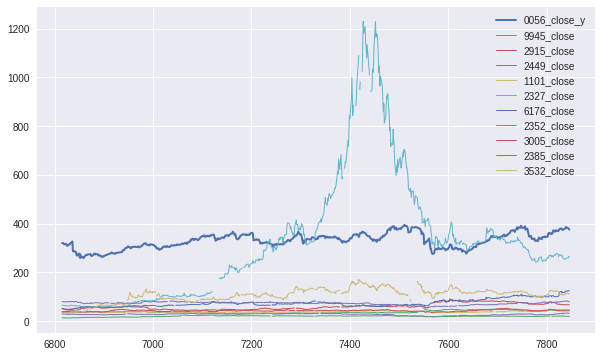

In [4]:
fig = plt.figure(figsize=(10,6))
plot_series(path_0056[0],  linewidth=2)

for path in path_component:
    #fig = plt.figure(figsize=(10,5))
    plot_series(path)
    
plt.legend()
plt.show()

In [5]:
all_data_vis = []
for path in path_list:
    
    stock_name = path.split('/')[-1][:-4]
    
    df = pd.read_csv(path)
    df = df.sort_values(by = 'date').reset_index(drop = True)
    
    if stock_name != '0056':
        df.drop(columns = 'date', inplace = True)
    
    all_data_vis.append(df)
    
all_data_vis = pd.concat(all_data_vis, axis=1, join='outer')


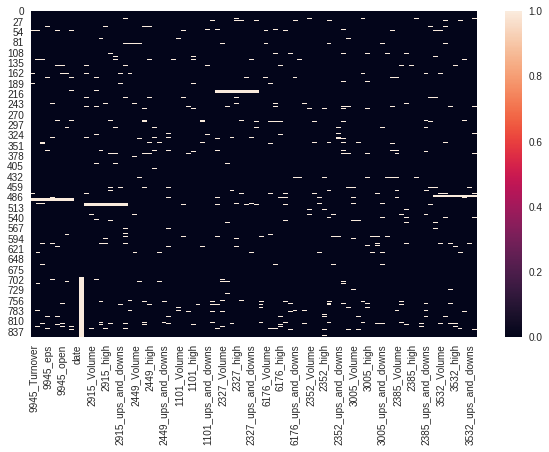

In [6]:
fig = plt.figure(figsize=(10, 6))
sns.heatmap(all_data_vis.isnull())
plt.show()

In [7]:
vis_data = all_data_vis.copy()
date_vis = vis_data['date']
close_y_0056_vis = vis_data.ix[date_vis <= 7846, '0056_close_y']
vis_data.drop(columns = [ 'date'], inplace = True)
vis_data = vis_data.ix[date_vis <= 7846, :]

In [8]:
stock = ['0056','1101','2327','2352','2385','2449','2915','3005','3532','6176','9945']
close = [x for x in vis_data.columns if 'close' in x]
eps = [x for x in vis_data.columns if 'eps' in x]
Volume = [x for x in vis_data.columns if 'Volume' in x]

In [9]:
#date_vis[date_vis <= 7846]  vis_data['0056_close_y']
def price_volumn_plot(x, y_0056_close, y_close, y_volumn, stock_name):
    fig = plt.figure(figsize = (8,6))
    ax1 = fig.add_subplot(211)
    ax1.plot(x, y_0056_close)
    ax1.set_ylabel('0056_close_y')
    ax2 = fig.add_subplot(212, sharex = ax1)
    ax2.plot(x, y_close)
    ax2.set_ylabel(stock_name + '_close')
    ax3 = ax2.twinx()
    ax3.bar(x, y_volumn)
    ax3.set_ylabel(stock_name + '_Volume')
    plt.tight_layout()
    plt.show()


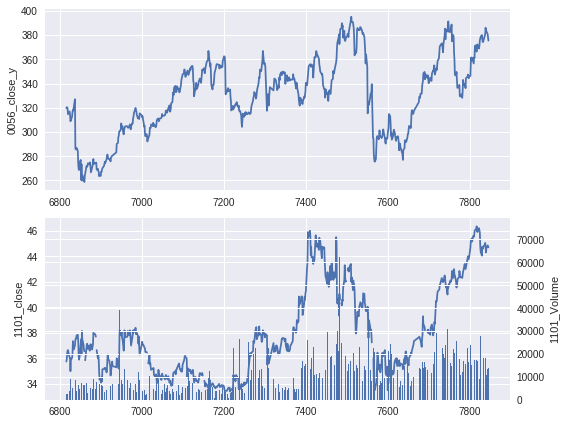

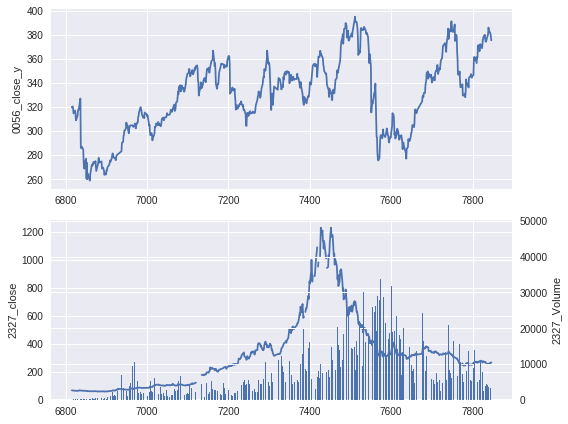

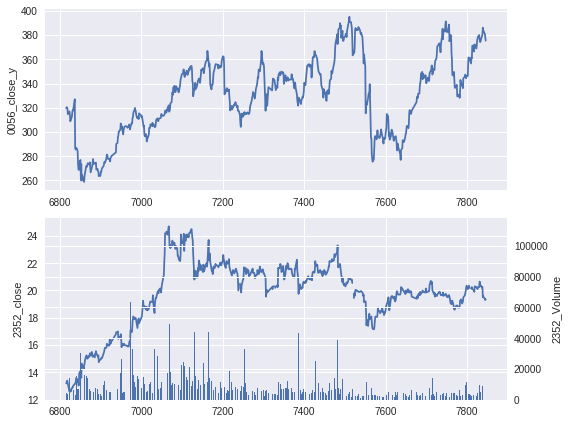

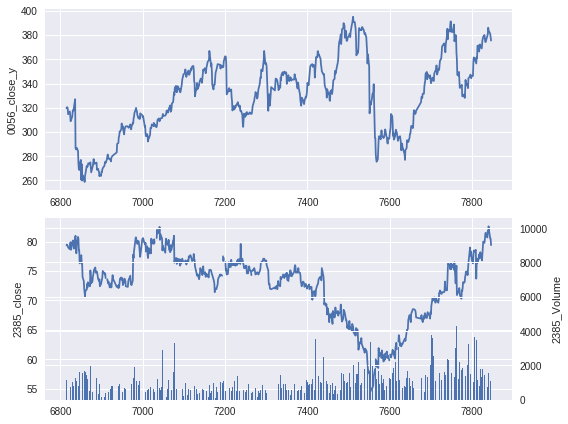

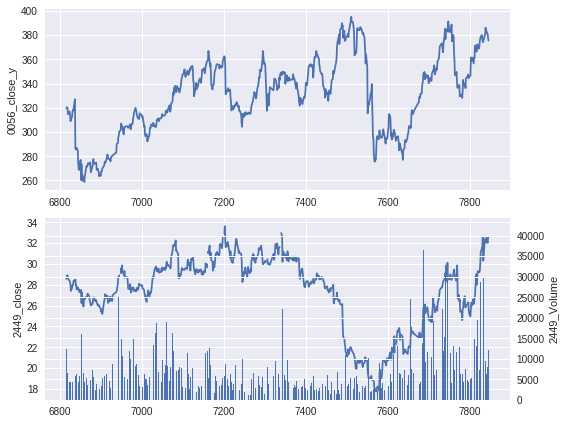

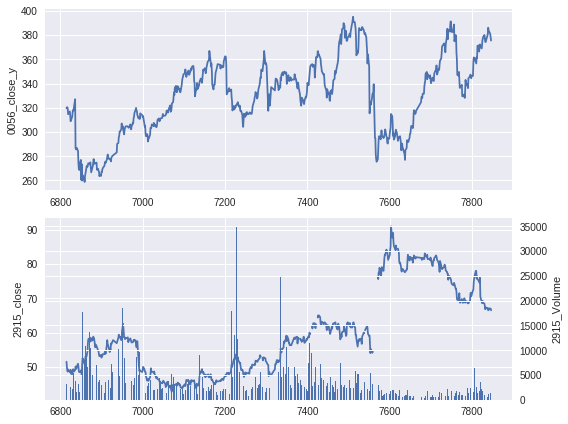

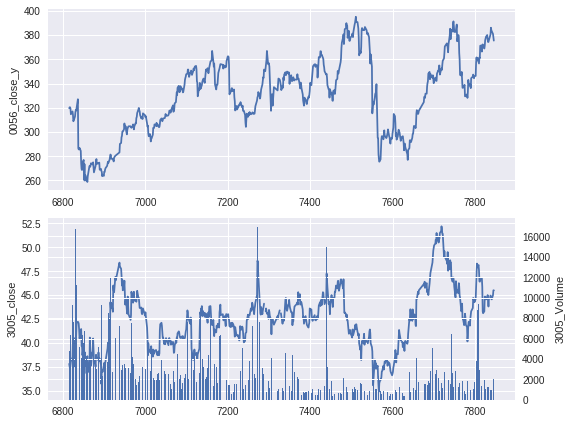

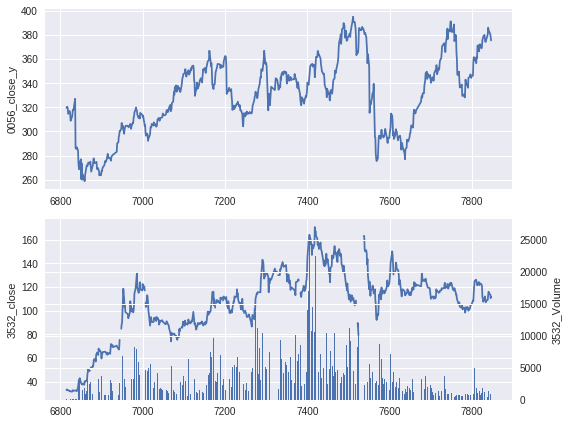

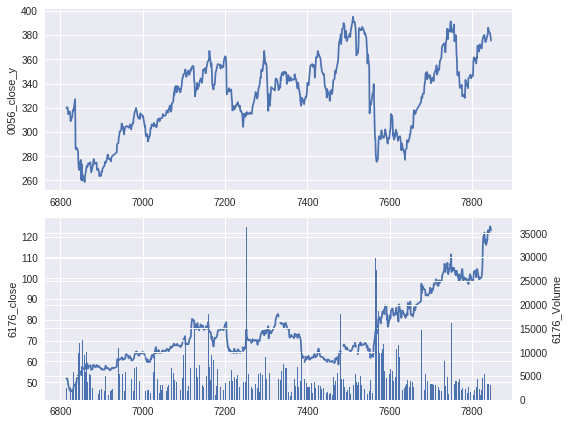

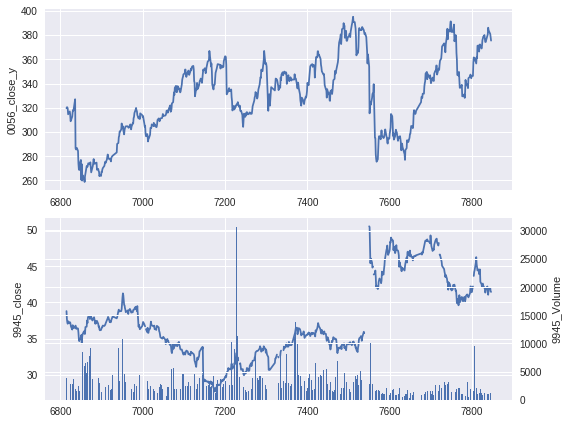

In [10]:
_0056_close = vis_data['0056_close_y']
for s in stock:
    if s == '0056':
        continue
    price_volumn_plot(date_vis[date_vis <= 7846], _0056_close, vis_data[s +'_close'], vis_data[s + '_Volume'], s)

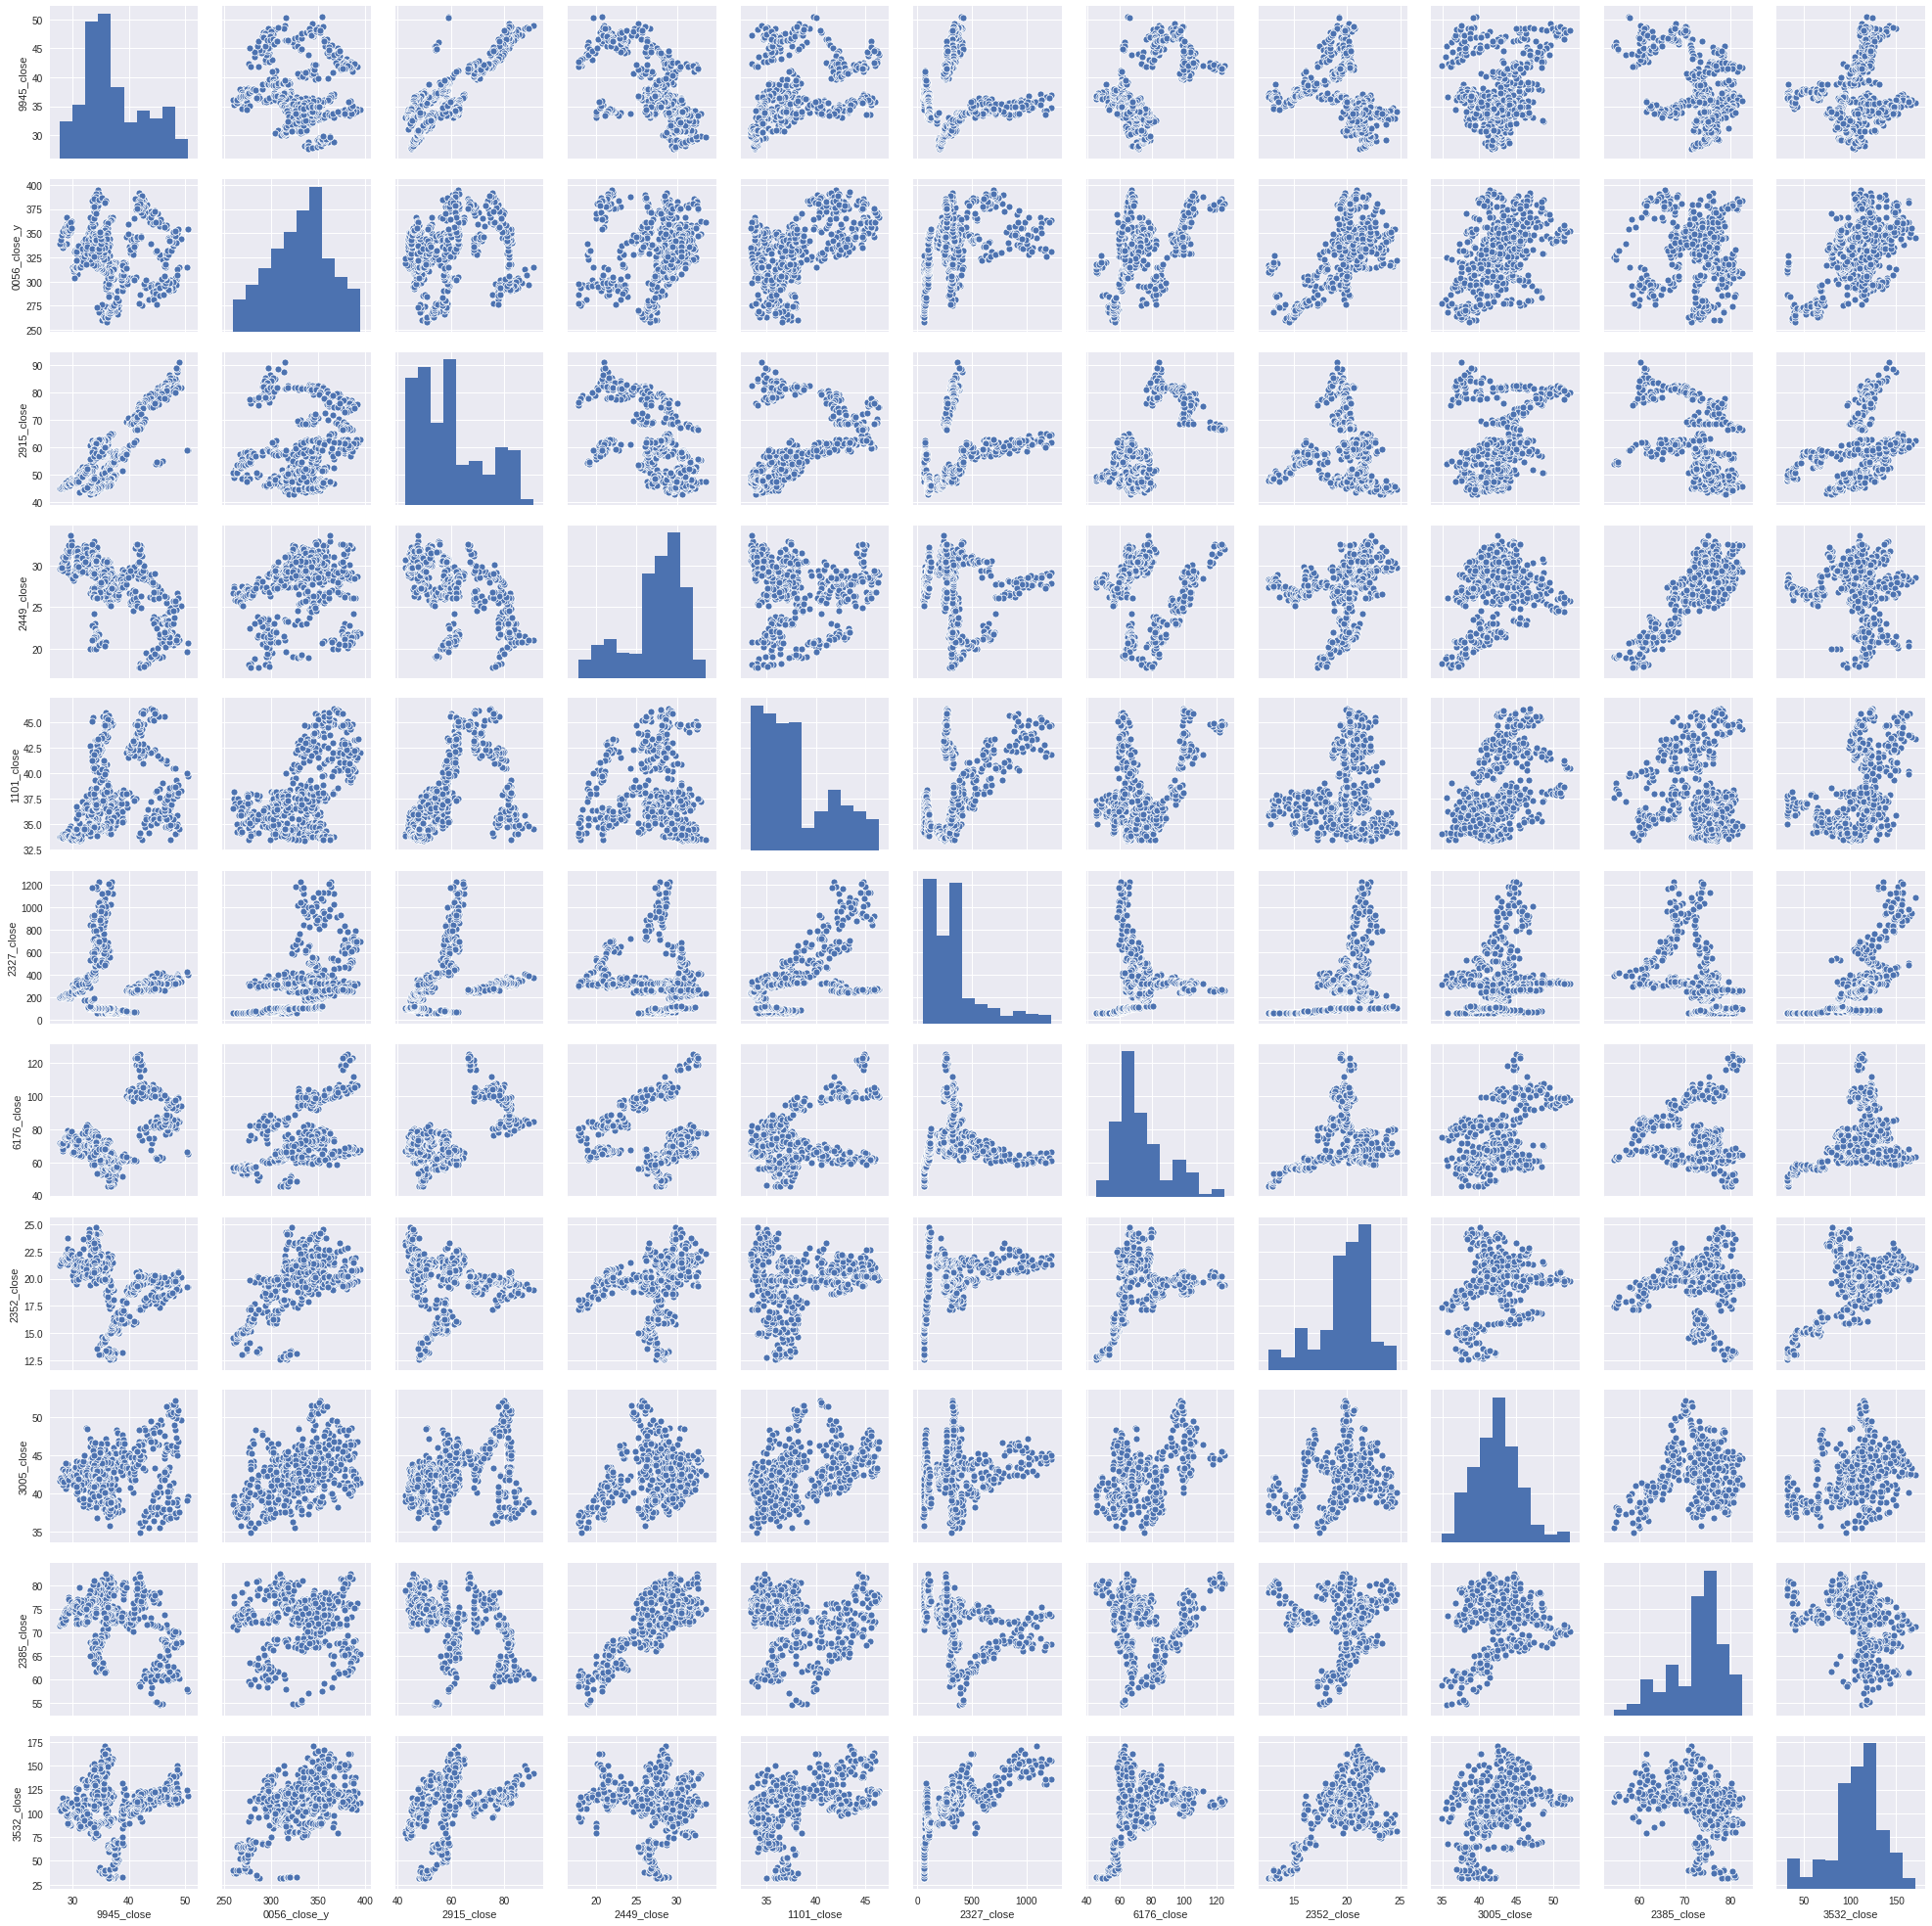

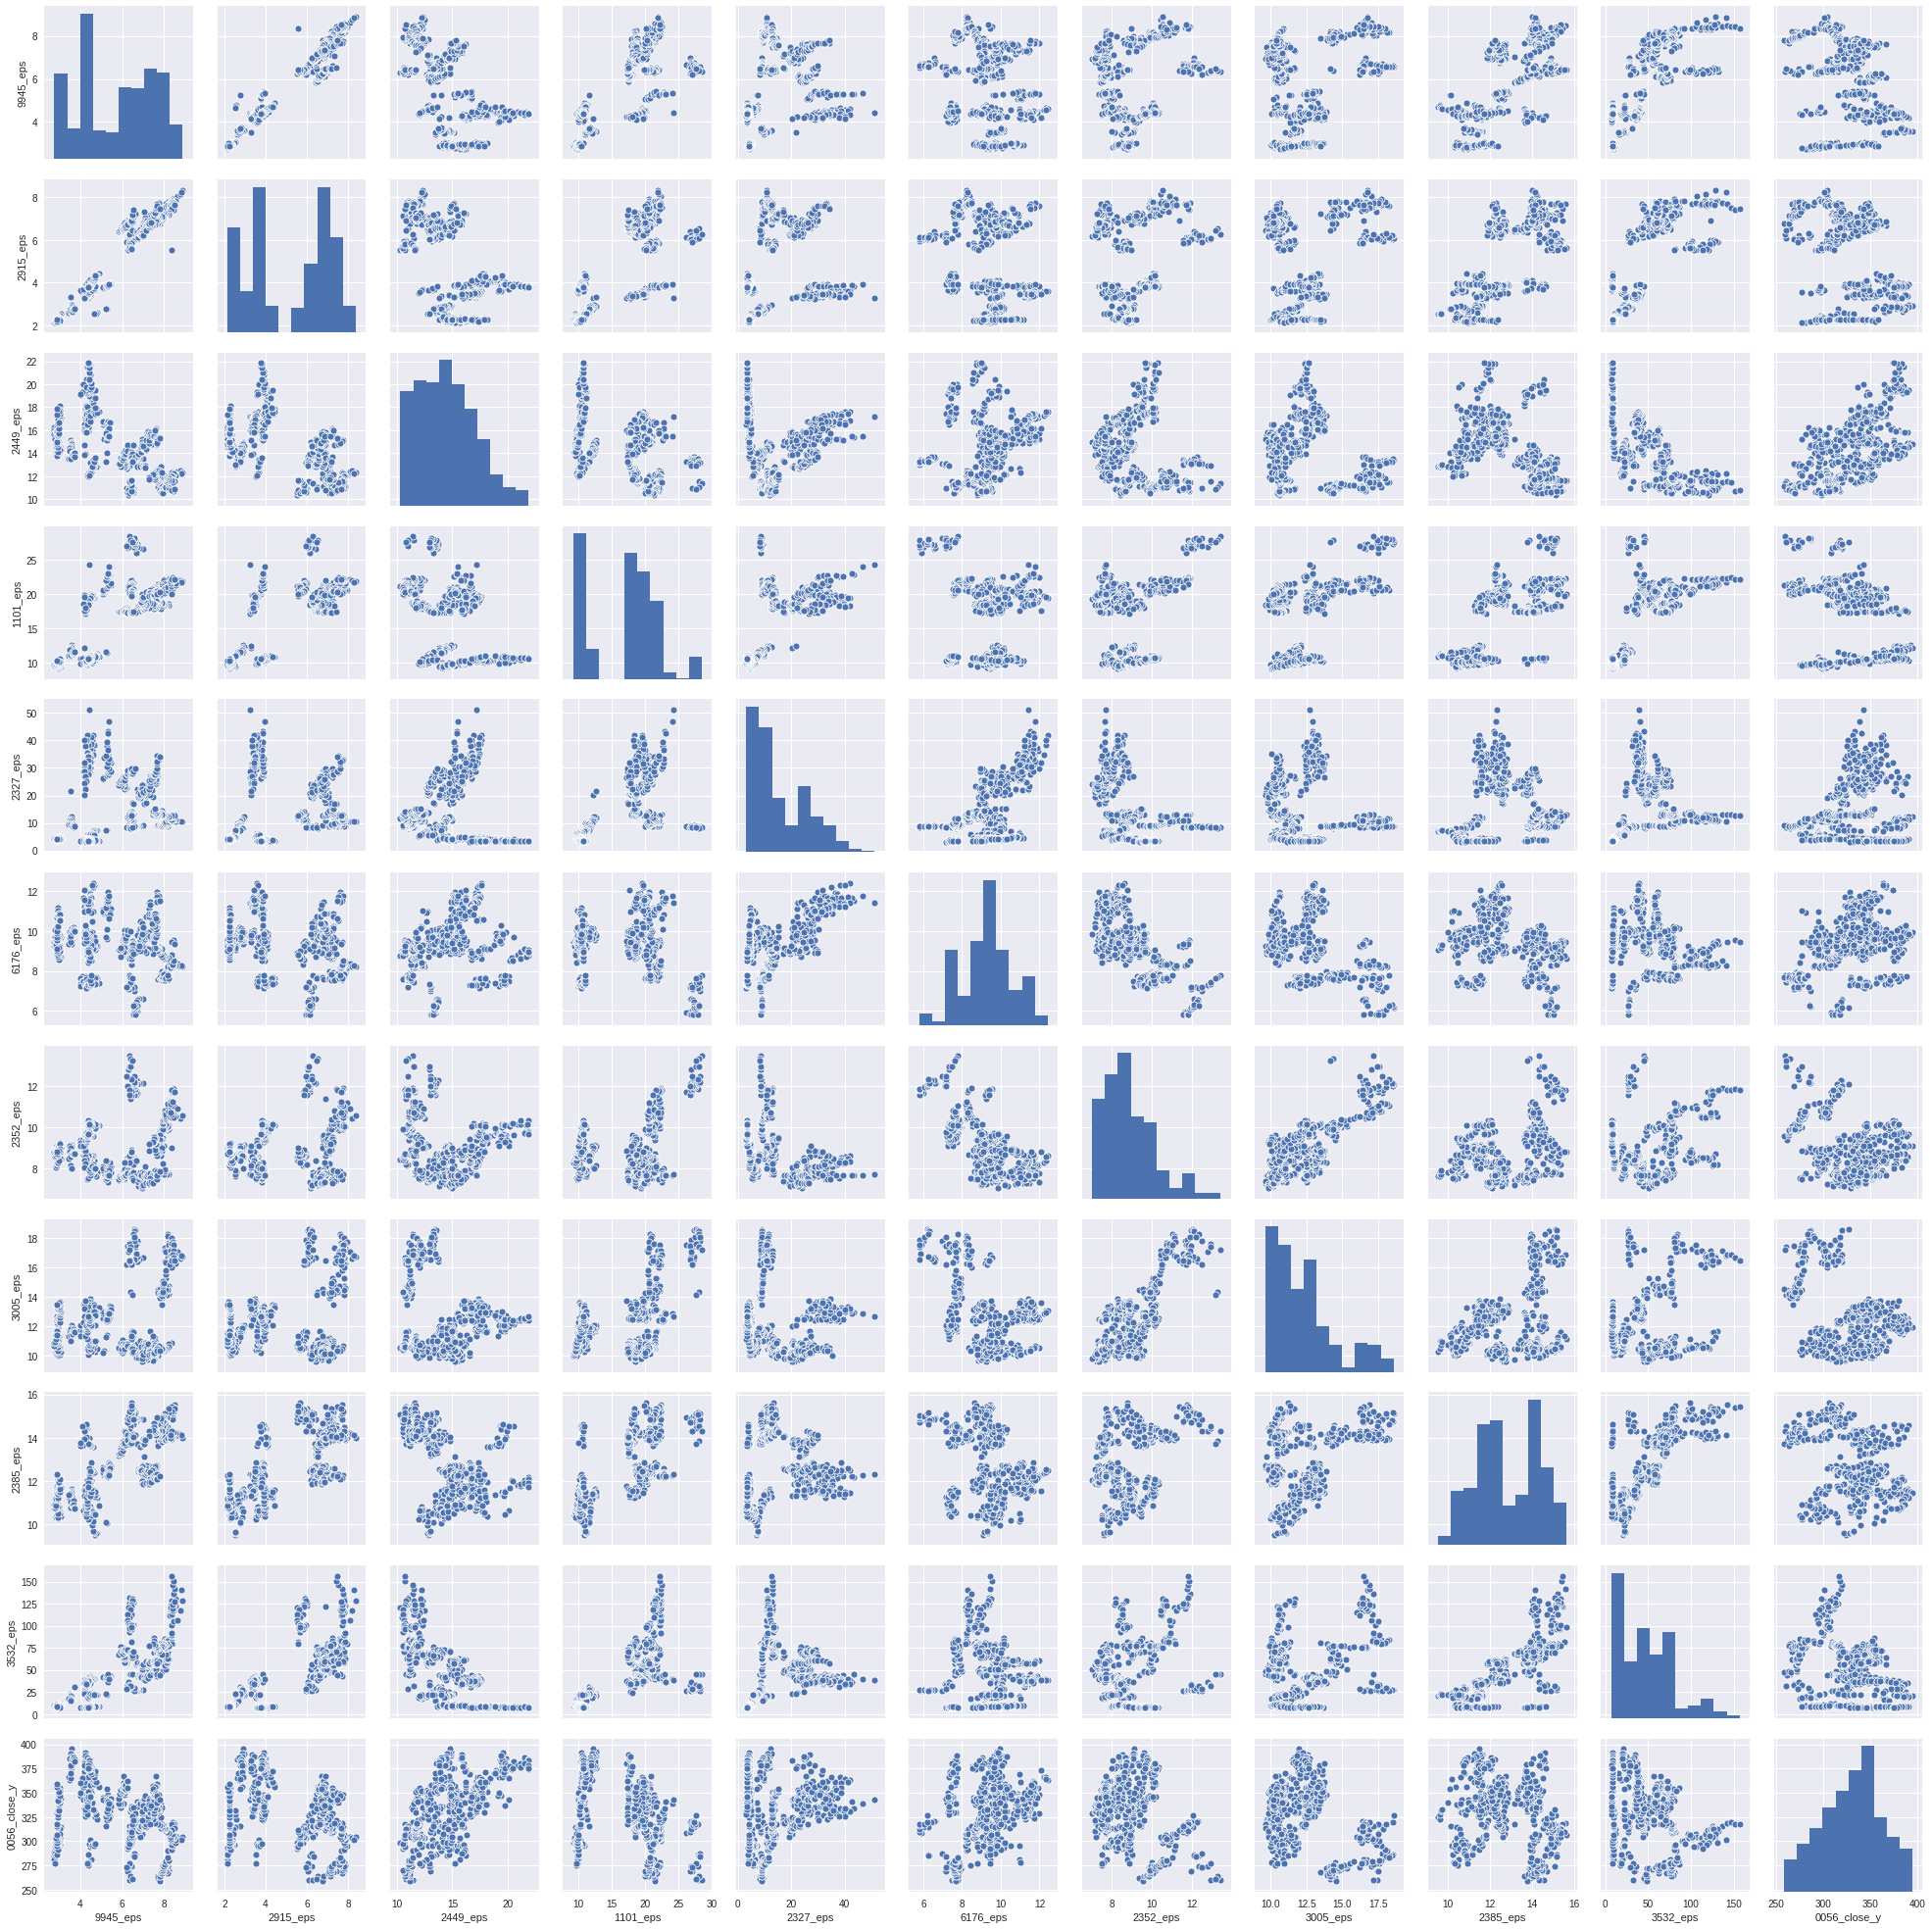

In [41]:
sns.pairplot(vis_data[close])
plt.show()
sns.pairplot(vis_data[eps + ['0056_close_y']])
plt.show()

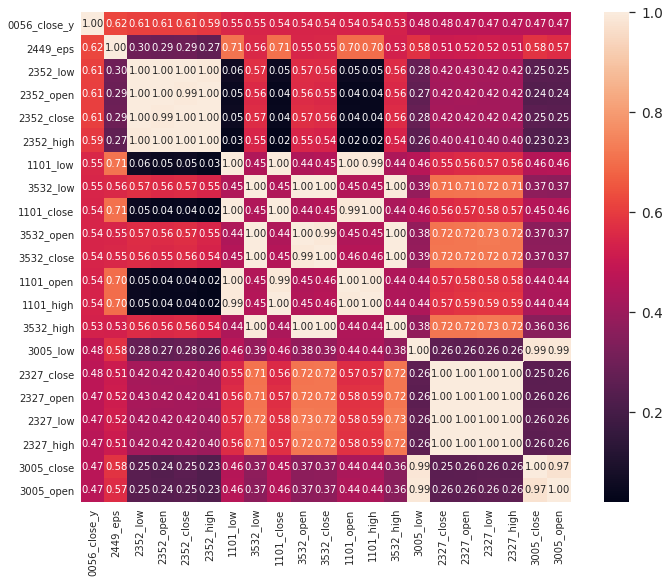

In [42]:
corrmat = vis_data.corr()

k = 21 #number of variables for heatmap
corr_20_cols = corrmat.nlargest(k, '0056_close_y')['0056_close_y'].index
cm = vis_data[corr_20_cols].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=corr_20_cols.values, xticklabels=corr_20_cols.values)
plt.show()

# Feature Engineering

In [11]:
all_data = []
for path in path_list:
    
    stock_name = path.split('/')[-1][:-4]
    
    if stock_name in ['9945', '2915', '2327', '3523']:
        continue
    
    df = pd.read_csv(path)
    df = df.sort_values(by = 'date').reset_index(drop = True)
    
    if stock_name != '0056':
        df.drop(columns = 'date', inplace = True)
        
        # missing value imputation
        df.interpolate(method = 'linear',  limit_direction='both', inplace = True)
        df[stock_name + '_range'] = df[stock_name + '_high'] - df[stock_name + '_low']
       
        df[stock_name + '_MA5'] = df[stock_name + '_close'].rolling(5).mean().shift()
        df[stock_name + '_MA10'] = df[stock_name + '_close'].rolling(10).mean().shift()
        df[stock_name + '_MA20'] = df[stock_name + '_close'].rolling(20).mean().shift()
        df.drop(columns = stock_name + '_close', inplace = True)
#         df.drop(columns = stock_name + '_open', inplace = True)
#         df.drop(columns = stock_name + '_high', inplace = True)
#         df.drop(columns = stock_name + '_low', inplace = True) 
#         df.drop(columns = stock_name + '_Turnover', inplace = True)
#         df.drop(columns = stock_name + '_Volume', inplace = True)
    
    all_data.append(df)
    
all_data =pd.concat(all_data, axis=1, join='outer')

In [12]:
all_data['week_day'] = all_data['date'] % 5
all_data.drop([x for x in range(20)], axis=0, inplace = True)

In [13]:
all_data.head(5)

date  0056_close_y  2449_Turnover  2449_Volume  2449_eps  2449_high  \
20  6844    274.012332       111007.0       4018.0     13.06      27.75   
21  6845    269.369223       119440.0       4326.0     13.01      27.75   
22  6846    268.639578       221355.0       8053.0     13.06      27.70   
23  6847    273.767009       158125.0       5778.0     12.94      27.55   
24  6850    276.964427       242572.0       8871.0     12.91      27.50   

    2449_low  2449_open  2449_ups_and_downs  2449_ups_percent  ...  3532_high  \
20     27.50      27.50               -0.20             -0.72  ...      38.75   
21     27.45      27.60               -0.10             -0.36  ...      42.25   
22     27.35      27.35                0.10              0.36  ...      41.35   
23     27.30      27.45               -0.25             -0.91  ...      43.40   
24     27.20      27.50               -0.05             -0.18  ...      42.55   

    3532_low  3532_open  3532_ups_and_downs  3532_ups_percent  3532_range  \
20     34.55       35.3                3.50             8.345        4.20   
21     39.95       41.5                2.60             6.710        2.30   
22     39.05       40.1               -1.65            -3.990        2.30   
23     39.00       39.0                3.30             8.310        4.40   
24     38.70       42.4               -3.50            -8.140        3.85   

    3532_MA5  3532_MA10  3532_MA20  week_day  
20     32.88     32.755    32.6375         4  
21     34.12     33.350    32.9175         0  
22     35.92     34.225    33.3100         1  
23     37.42     34.925    33.6400         2  
24     39.61     35.980    34.1350         0  

[5 rows x 87 columns]

## Standardize

In [14]:
cal_data = all_data.copy()

In [15]:
date = cal_data['date']
close_y_0056 = cal_data.ix[date <= 7846, '0056_close_y']
cal_data.drop(columns = ['0056_close_y', 'date'], inplace = True)

In [16]:
std_cols = list(cal_data.columns)
std_cols.remove('week_day')

In [17]:
cal_data[std_cols] = (cal_data[std_cols] - cal_data[std_cols].min()) / (cal_data[std_cols].max() - cal_data[std_cols].min())
#cal_data.drop(columns = '2327_close',axis =1,  inplace = True)

In [18]:
cal_data.isnull().any().sum()

0

In [19]:
# cal_data['week_day'] = cal_data['week_day'].astype(str)
# cal_data = pd.get_dummies(cal_data)

In [21]:
train = cal_data.ix[date <= 7846, :]
test = cal_data.ix[date > 7846, :]

# Modeling 

In [22]:
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingRegressor

In [23]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, close_y_0056, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [24]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
model_xgb = xgb.XGBRegressor(
                             colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1
)
model_lgb = lgb.LGBMRegressor(
                              objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11
)
model_rf = RandomForestRegressor()
svr = SVR(
      kernel='rbf', degree=3, 
      gamma='scale', coef0=0.0, tol=0.001,
      C=1.0, epsilon=0.1
)

In [25]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [26]:
score = rmsle_cv(model_rf)
print("\nKRR score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


KRR score: 31.5773 (9.1253)



In [27]:
score = rmsle_cv(KRR)
print("\nKRR score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


KRR score: 22.1813 (10.4543)



In [28]:
def print_best_score(gsearch,param_test):
     # 输出best score
    print("Best score: %0.3f" % gsearch.best_score_)
    print("Best parameters set:")

    best_parameters = gsearch.best_estimator_.get_params()
    for param_name in sorted(param_test.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))
para_dict = {
    'kernel' : ['rbf', 'poly'],
    'degree' : [2,3,4,5],
    'C' : [1, 1.5, 2.0, 3.0, 3.5, 4.0],
    'epsilon' : [0.1, 0.2, 0.3, 0.4]
}
para_xgb = {
    'learning_rate' : [0.01, 0.05],
    'n_estimators' : [2000,2500,3000,3500],
    'max_depth' : [3,4,5],
}

In [29]:
gsearch = GridSearchCV(svr , param_grid = para_dict, scoring='neg_root_mean_squared_error', cv=5)

gsearch.fit(train.values, close_y_0056)
# print(gsearch.grid_scores_, gsearch.best_params_, gsearch.best_score_)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 1.5, 2.0, 3.0, 3.5, 4.0],
                         'degree': [2, 3, 4, 5],
                         'epsilon': [0.1, 0.2, 0.3, 0.4],
                         'kernel': ['rbf', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_root_mean_squared_error', verbose=0)

In [30]:
print_best_score(gsearch , para_dict)

Best score: -19.069
Best parameters set:
	C: 4.0
	degree: 2
	epsilon: 0.3
	kernel: 'poly'


In [31]:
score = rmsle_cv(SVR(C = 4.0, kernel = 'poly', degree = 2, epsilon = 0.3))
print("\nSVR score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


SVR score: 19.0688 (11.0397)



In [32]:
score = rmsle_cv(model_xgb)
print("\nXgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Xgboost score: 26.7822 (8.4565)



In [33]:
score = rmsle_cv(model_lgb)
print("\nmodel_lgb score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


model_lgb score: 26.2723 (8.6897)



In [34]:
model_xgb.fit(train.values, close_y_0056)
xgb_train_pred = model_xgb.predict(train.values)
xgb_pred = model_xgb.predict(test.values)
print(rmsle(close_y_0056, xgb_train_pred))

0.11871773001310351


In [35]:
model_lgb.fit(train.values, close_y_0056)
lgb_train_pred = model_lgb.predict(train.values)
lgb_pred = model_lgb.predict(test.values)
print(rmsle(close_y_0056, lgb_train_pred))

1.8589622033362674


In [36]:
gsearch.best_estimator_
svr_train_pred = gsearch.best_estimator_.predict(train.values)
svr_pred = gsearch.best_estimator_.predict(test.values)
print(rmsle(close_y_0056, lgb_train_pred))

1.8589622033362674


In [37]:
KRR.fit(train.values, close_y_0056)
KRR_train_pred = KRR.predict(train.values)
KRR_pred = KRR.predict(test.values)
print(rmsle(close_y_0056, xgb_train_pred))

0.11871773001310351


In [38]:
ensemble = (svr_pred + KRR_pred + xgb_pred + lgb_pred)/4

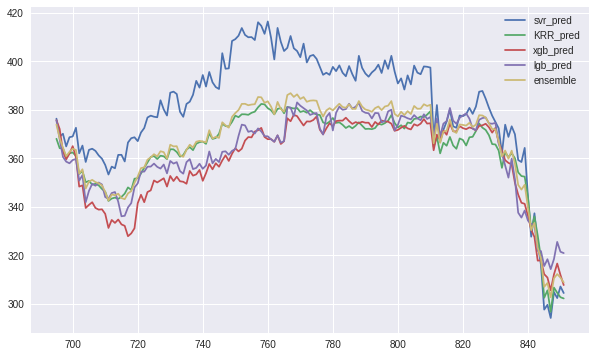

In [39]:
sub = pd.DataFrame()
sub['date'] = date[date > 7846]
sub['svr_pred'] = svr_pred
sub['KRR_pred'] = KRR_pred
sub['xgb_pred'] = xgb_pred
sub['lgb_pred'] = lgb_pred
sub['ensemble'] = ensemble
sub['0056_close_y'] = ensemble
sub.sort_values(by = 'date', ascending=False, inplace=True)
plt.figure(figsize = (10,6))
plt.plot(sub['svr_pred'], label = 'svr_pred')
plt.plot(sub['KRR_pred'], label = 'KRR_pred')
plt.plot(sub['xgb_pred'], label = 'xgb_pred')
plt.plot(sub['lgb_pred'], label = 'lgb_pred')
plt.plot(sub['ensemble'], label = 'ensemble')
plt.legend()
plt.show()

In [40]:
sub_final = pd.DataFrame()
sub_final['date'] = date[date > 7846]
sub_final['0056_close_y'] = svr_pred
sub_final.sort_values(by = 'date', ascending=False, inplace=True)
sub_final.to_csv('submission.csv',index=False)